In [1]:
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
from simtk import unit

# Harmonic Well Potential

The harmonic well potential is described by the following expression:

\begin{equation}
f(x)=\frac{1}{2} k \left(x^2 + y^2 + z^2 \right)
\end{equation}

Where $k$ is the only parameter and represents the stiffness of the harmonic potential -or the stiffness of the harmonic spring described by the hookes' law-. Notice that the potential for potential dimensions $Y$ and $Z$, has the same shape. In this way we have a three dimensional harmonic well. But let's see here only the proyection over a single dimension $X$ since $Y$ and $Z$ are decorrelated, and there by will behave as $X$.

In [2]:
def harmonic_well(x,k):
    return 0.5*k*x**2

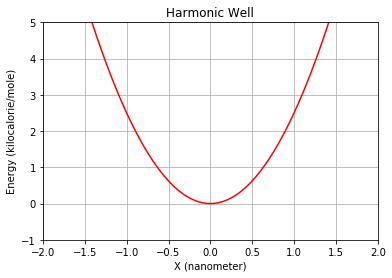

In [3]:
k=5.0 * unit.kilocalories_per_mole/ unit.nanometers**2 # stiffness of the harmonic potential

x_serie = np.arange(-5., 5., 0.05) * unit.nanometers

plt.plot(x_serie, harmonic_well(x_serie, k), 'r-')
plt.ylim(-1,5)
plt.xlim(-2,2)
plt.grid()
plt.xlabel("X ({})".format(unit.nanometers))
plt.ylabel("Energy ({})".format(unit.kilocalories_per_mole))
plt.title("Harmonic Well")
plt.show()

Different values of $k$ can be tested to graphically see how this parameter accounts for the openness of the well's arms. Or, as it is described below, the period of oscillations of a particle of mass $m$ in a newtonian dynamics.

The hooks' law describes the force suffered by a mass attached to an ideal spring as:

\begin{equation}
F(x) = -k(x-x_{0})
\end{equation}

Where $k$ is the stiffness of the spring and $x_{0}$ is the equilibrium position. Now, since the force is minus the gradient of the potential energy $V(x)$,

\begin{equation}
F(x) = -\frac{d V(x)}{dx},
\end{equation}

we can proof that the spring force is the result of the first harmonic potential derivative:

\begin{equation}
V(x) = \frac{1}{2} k (x-x_{0})^{2}
\end{equation}

And the angular frequency of oscillations of a spring, or a particle goberned by the former potential, is:

\begin{equation}
\omega = \sqrt{\frac{k}{m}}
\end{equation}

Where $m$ is the mass of the particle. This way the potential can also be written as:

\begin{equation}
V(x) = \frac{1}{2} k (x-x_{0})^{2} = \frac{1}{2} m \omega^{2} (x-x_{0})^{2}
\end{equation}

Finnally, the time period of these oscillations are immediately computed from the mass of the particle, $m$, and the stiffness parameter $k$. Given that by definition:

\begin{equation}
T = 2\pi / \omega
\end{equation}

Then:

\begin{equation}
T = 2\pi \sqrt{\frac{m}{k}}
\end{equation}

## Working with this test system

This test system is fully documented in [HarmonicWell class API](../api/_autosummary/uibcdf_test_systems.HarmonicWell.html). Let's see an example of how to interact with it:

In [4]:
from uibcdf_test_systems import HarmonicWell

harmonic_well = HarmonicWell(n_particles = 1, mass = 32 * unit.amu,
                             k=5.0 * unit.kilocalories_per_mole/unit.nanometers**2)

The potential expression and the value of the parameters are stored in `potential`:

In [5]:
harmonic_well.potential_expression

0.5*k*(x**2 + y**2 + z**2)

In [6]:
harmonic_well.potential_parameters

{'k': Quantity(value=5.0, unit=kilocalorie/(nanometer**2*mole))}

And there is a method to evaluate the potential at a given positions:

In [7]:
harmonic_well.potential([-1.5, 0.0, 0.0] * unit.nanometers)

Quantity(value=5.625, unit=kilocalorie/mole)

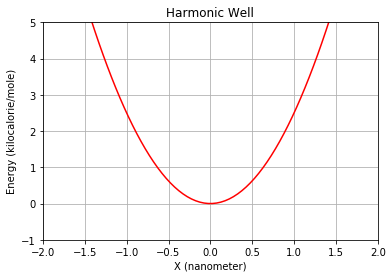

In [8]:
position = np.zeros((200,3), dtype=float) * unit.nanometers
position[:,0] = np.linspace(-5., 5., 200) * unit.nanometers

plt.plot(position[:,0], harmonic_well.potential(position) , 'r-')
plt.ylim(-1,5)
plt.xlim(-2,2)
plt.grid()
plt.xlabel("X ({})".format(unit.nanometers))
plt.ylabel("Energy ({})".format(unit.kilocalories_per_mole))
plt.title("Harmonic Well")
plt.show()

### Newtonian dynamics

A newtonian dynamics can be easily run thanks to the method 'simulation.newtonian' included in this library. This method is nothing but the sequence of instructions to simulate a system with OpenMM wrapped up here for the sake of .

In [9]:
from uibcdf_test_systems.simulation import newtonian

initial_positions =  np.zeros([1, 3], np.float32) * unit.nanometers
initial_velocities = np.zeros([1, 3], np.float32) * unit.nanometers/unit.picoseconds
initial_positions[0,0] = 1.1 * unit.nanometers

time, position, velocity, kinetic_energy, potential_energy = newtonian (harmonic_well.system,
                                                                        initial_positions = initial_positions,
                                                                        initial_velocities = initial_velocities,
                                                                        integration_timestep = 0.02 * unit.picoseconds,
                                                                        saving_timestep = 0.5 * unit.picoseconds,
                                                                        total_time = 50 * unit.picoseconds)

We can now plot the trajectory of the x coordinate:

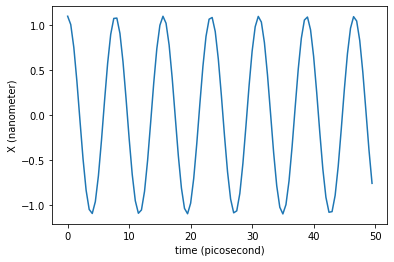

In [10]:
plt.plot(time, position[:,0,0])
plt.xlabel('time ({})'.format(time.unit))
plt.ylabel('X ({})'.format(position.unit))
plt.show()

We can wonder now if the period of these oscillations is in agreement with the value calculated above.

In [11]:
mass = 32 * unit.amu
T = 2*np.pi*np.sqrt(mass/k)

print('The period of the small oscillations around the minimum is',T)

The period of the small oscillations around the minimum is 7.770948260727904 ps


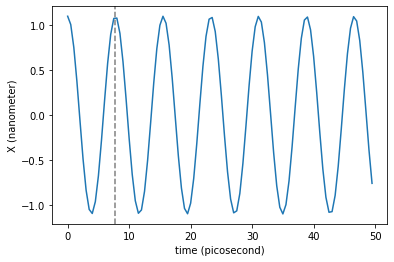

In [12]:
plt.plot(time, position[:,0,0])
plt.axvline(T._value, color='gray', linestyle='--') # Period of the harmonic oscillations
plt.xlabel('time ({})'.format(time.unit))
plt.ylabel('X ({})'.format(position.unit))
plt.show()

Remember that the integration timestep must be smaller than $\sim T/10.0$ to guarantee that no artifacts are introduced by the timestep size.

The newtonian dynamics can also include damping. This way we can simulate damped oscillations around the minimum.

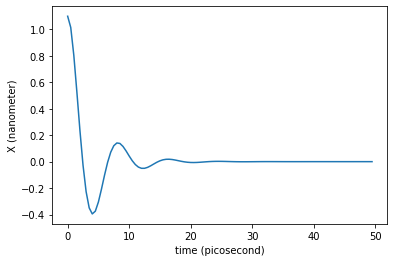

In [13]:
time, position, velocity, kinetic_energy, potential_energy = newtonian (harmonic_well.system,
                                                                        friction = 0.5 / unit.picoseconds,
                                                                        initial_positions = initial_positions,
                                                                        initial_velocities = initial_velocities,
                                                                        integration_timestep = 0.02 * unit.picoseconds,
                                                                        saving_timestep = 0.5 * unit.picoseconds,
                                                                        total_time = 50 * unit.picoseconds)

plt.plot(time, position[:,0,0])
plt.xlabel('time ({})'.format(time.unit))
plt.ylabel('X ({})'.format(position.unit))
plt.show()

What would be the friction value needed to enter in the overdamped regime?

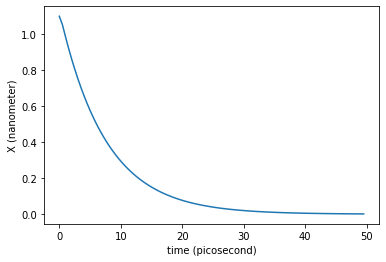

In [14]:
time, position, velocity, kinetic_energy, potential_energy = newtonian (harmonic_well.system,
                                                                        friction = 5.0 / unit.picoseconds,
                                                                        initial_positions = initial_positions,
                                                                        initial_velocities = initial_velocities,
                                                                        integration_timestep = 0.02 * unit.picoseconds,
                                                                        saving_timestep = 0.5 * unit.picoseconds,
                                                                        total_time = 50 * unit.picoseconds)

plt.plot(time, position[:,0,0])
plt.xlabel('time ({})'.format(time.unit))
plt.ylabel('X ({})'.format(position.unit))
plt.show()

### Langevin NVT run

Thanks to the `simulation.langevin_NVT` method in this library, a simple newtonian dynamics can be run with few efforce:

In [17]:
from uibcdf_test_systems.simulation import langevin_NVT

initial_positions[0,0] = 1.0 * unit.nanometers

time, position, velocity, kinetic_energy, potential_energy = langevin_NVT (harmonic_well.system,
                                                                           temperature = 300 * unit.kelvin,
                                                                           friction = 1.0 / unit.picoseconds,
                                                                           initial_positions = initial_positions,
                                                                           initial_velocities = initial_velocities,
                                                                           integration_timestep = 0.02 * unit.picoseconds,
                                                                           saving_timestep = 0.5 * unit.picoseconds,
                                                                           total_time = 0.5 * unit.nanoseconds)

Let us see the time evolution of the coordinate $x$ of our single particle:

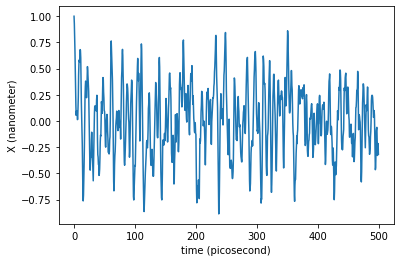

In [18]:
plt.plot(time, position[:,0,0])
plt.xlabel('time ({})'.format(time.unit))
plt.ylabel('X ({})'.format(position.unit))
plt.show()